**THIS VERSION OF THE ASSIGNMENT (USING YOLO AND COCO DATASET) IS OUTDATED, AND IS ONLY KEPT TO SHOW THE STEADY PROGRESS. FOR AN UPDATED VERSION, WHICH CAN NOT ONLY SEGMENT PREDEFINED COCO AND COCO SYNONYMS, BUT ANY OBJECT USING GROUNDING-DINO, PLEASE USE THE AVATAAR_ASSIGNMENT_NEW.IPYNB**

LINK TO THE UPDATED VERSION USING GROUNDING DINO:<br>
Kaggle notebook link to run directly:<br>
https://www.kaggle.com/code/ronitkhurana/avataar-assignment-cont <br>
Github link to check commits:<br>
https://github.com/ronit1706/Avataar_Assignment/blob/main/Avataar_Assignment_New.ipynb<br>

This whole project has been a great learning experience, and all the time and effort spent was spent well!




Thank you for reviewing my code. Hope you like it!

In [1]:
!pip install ultralytics segment-anything cvlib diffusers transformers accelerate torch torchvision opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.5 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.6 MB/s eta 0:00:00:00:01
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=64d27ff7303e62decb55c02966ed664ea08e90bf9c1b37398f48fa25516c453f
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=e9a5ecd8ec0ea4910f1b8c9ff696ca42bc7007062e1fa1c2ae864598825ca1a6
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=0cf9d45e79a7e

In [2]:
import cv2
from cvlib.object_detection import draw_bbox
from PIL import Image

import numpy as np
import math

import torch
from diffusers import StableDiffusionInpaintPipeline
from segment_anything import SamPredictor, sam_model_registry

from scipy.ndimage import gaussian_filter
from skimage import exposure

import matplotlib.pyplot as plt

from ultralytics import YOLO

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float32
).to(device)

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280

In [4]:
coco_class_ids = {
    'person': 0,
    'bicycle': 1,
    'car': 2,
    'motorcycle': 3,
    'airplane': 4,
    'bus': 5,
    'train': 6,
    'truck': 7,
    'boat': 8,
    'traffic light': 9,
    'fire hydrant': 10,
    'stop sign': 11,
    'parking meter': 12,
    'bench': 13,
    'bird': 14,
    'cat': 15,
    'dog': 16,
    'horse': 17,
    'sheep': 18,
    'cow': 19,
    'elephant': 20,
    'bear': 21,
    'zebra': 22,
    'giraffe': 23,
    'backpack': 24,
    'umbrella': 25,
    'handbag': 26,
    'tie': 27,
    'suitcase': 28,
    'frisbee': 29,
    'skis': 30,
    'snowboard': 31,
    'sports ball': 32,
    'kite': 33,
    'baseball bat': 34,
    'baseball glove': 35,
    'skateboard': 36,
    'surfboard': 37,
    'tennis racket': 38,
    'bottle': 39,
    'wine glass': 40,
    'cup': 41,
    'fork': 42,
    'knife': 43,
    'spoon': 44,
    'bowl': 45,
    'banana': 46,
    'apple': 47,
    'sandwich': 48,
    'orange': 49,
    'broccoli': 50,
    'carrot': 51,
    'hot dog': 52,
    'pizza': 53,
    'donut': 54,
    'cake': 55,
    'chair': 56,
    'couch': 57,
    'potted plant': 58,
    'bed': 59,
    'dining table': 60,
    'toilet': 61,
    'TV': 62,
    'laptop': 63,
    'mouse': 64,
    'remote': 65,
    'keyboard': 66,
    'cell phone': 67,
    'microwave': 68,
    'oven': 69,
    'toaster': 70,
    'sink': 71,
    'refrigerator': 72,
    'book': 73,
    'clock': 74,
    'vase': 75,
    'scissors': 76,
    'teddy bear': 77,
    'hair drier': 78,
    'toothbrush': 79
}

object_synonyms = {
    'bag': ['handbag', 'backpack', 'suitcase', 'bag'],
    'luggage': ['suitcase', 'backpack', 'luggage'],

    'vehicle': ['car', 'truck', 'bus', 'bicycle', 'motorcycle', 'vehicle'],
    'car': ['car', 'truck', 'bus', 'car'],
    'bike': ['bicycle', 'motorcycle', 'bike'],
    'aircraft': ['airplane', 'aircraft'],
    'ship': ['boat', 'ship'],
    'train': ['train', 'train'],

    'animal': ['dog', 'cat', 'elephant', 'zebra', 'horse', 'bird', 'cow', 'sheep', 'bear', 'giraffe', 'animal'],
    'pet': ['dog', 'cat', 'pet'],
    'wild animal': ['elephant', 'zebra', 'bear', 'giraffe', 'horse', 'wild animal'],
    'bird': ['bird', 'bird'],
    'farm animal': ['cow', 'sheep', 'horse', 'farm animal'],

    'dog': ['dog', 'dog'],
    'cat': ['cat', 'cat'],

    'furniture': ['chair', 'couch', 'bed', 'dining table', 'bench', 'furniture'],
    'table': ['dining table', 'table'],
    'chair': ['chair', 'couch', 'chair'],
    'bed': ['bed', 'bed'],
    'seating': ['chair', 'couch', 'bench', 'seating'],
    'stool' : ['chair','seating'],

    'device': ['laptop', 'cell phone', 'mouse', 'keyboard', 'remote', 'device'],
    'computer': ['laptop', 'keyboard', 'mouse', 'computer'],
    'phone': ['cell phone', 'phone'],
    'tv': ['TV', 'tv'],
    'remote': ['remote', 'remote'],

    'kitchen item': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'kitchen item'],
    'utensil': ['fork', 'knife', 'spoon', 'utensil'],
    'glass': ['wine glass', 'cup', 'glass'],
    'dish': ['bowl', 'dish'],
    'bottle': ['bottle', 'bottle'],

    'food': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'food'],
    'fruit': ['banana', 'apple', 'orange', 'fruit'],
    'vegetable': ['broccoli', 'carrot', 'vegetable'],
    'dessert': ['donut', 'cake', 'dessert'],
    'fast food': ['hot dog', 'pizza', 'fast food'],

    'clothing': ['tie', 'suitcase', 'clothing'],
    'accessory': ['tie', 'umbrella', 'accessory'],
    'umbrella': ['umbrella', 'umbrella'],

    'sign': ['stop sign', 'traffic light', 'parking meter', 'sign'],
    'light': ['traffic light', 'light'],

    'toy': ['teddy bear', 'toy'],
    'bear': ['teddy bear', 'bear'],

    'clock': ['clock', 'clock'],
    'book': ['book', 'book'],
    'plant': ['potted plant', 'plant'],
    'scissors': ['scissors', 'scissors'],
    'toiletries': ['toothbrush', 'hair drier', 'toiletries'],
    
    'laptop': ['laptop'],
    'handbag': ['handbag'],
    'backpack': ['backpack'],
    'suitcase': ['suitcase'],
    'bicycle': ['bicycle'],
    'motorcycle': ['motorcycle'],
    'airplane': ['airplane'],
    'bus': ['bus'],
    'train': ['train'],
    'truck': ['truck'],
    'boat': ['boat'],
    'traffic light': ['traffic light'],
    'fire hydrant': ['fire hydrant'],
    'stop sign': ['stop sign'],
    'parking meter': ['parking meter'],
    'bench': ['bench'],
    'bird': ['bird'],
    'cat': ['cat'],
    'dog': ['dog'],
    'horse': ['horse'],
    'sheep': ['sheep'],
    'cow': ['cow'],
    'elephant': ['elephant'],
    'bear': ['bear'],
    'zebra': ['zebra'],
    'giraffe': ['giraffe'],
    'frisbee': ['frisbee'],
    'skis': ['skis'],
    'snowboard': ['snowboard'],
    'sports ball': ['sports ball'],
    'kite': ['kite'],
    'baseball bat': ['baseball bat'],
    'baseball glove': ['baseball glove'],
    'skateboard': ['skateboard'],
    'surfboard': ['surfboard'],
    'tennis racket': ['tennis racket'],
    'bottle': ['bottle'],
    'wine glass': ['wine glass'],
    'cup': ['cup'],
    'fork': ['fork'],
    'knife': ['knife'],
    'spoon': ['spoon'],
    'bowl': ['bowl'],
    'banana': ['banana'],
    'apple': ['apple'],
    'sandwich': ['sandwich'],
    'orange': ['orange'],
    'broccoli': ['broccoli'],
    'carrot': ['carrot'],
    'hot dog': ['hot dog'],
    'pizza': ['pizza'],
    'donut': ['donut'],
    'cake': ['cake'],
    'chair': ['chair'],
    'couch': ['couch'],
    'potted plant': ['potted plant'],
    'bed': ['bed'],
    'dining table': ['dining table'],
    'toilet': ['toilet'],
    'TV': ['TV'],
    'mouse': ['mouse'],
    'remote': ['remote'],
    'keyboard': ['keyboard'],
    'cell phone': ['cell phone'],
    'microwave': ['microwave'],
    'oven': ['oven'],
    'toaster': ['toaster'],
    'sink': ['sink'],
    'refrigerator': ['refrigerator'],
    'book': ['book'],
    'clock': ['clock'],
    'vase': ['vase'],
    'scissors': ['scissors'],
    'teddy bear': ['teddy bear'],
    'hair drier': ['hair drier'],
    'toothbrush': ['toothbrush'],
}

In [5]:
model_type = "vit_h"
sam_checkpoint = "/kaggle/input/avataar/Avataar/sam_vit_h_4b8939.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


In [6]:
img_choice = input("Enter the image path: ") or "/kaggle/input/avataar/bagpack.jpg"
#SAMPLE IMAGES WITH PATH (KAGGLE):
#BAGPACK: /kaggle/input/avataar/bagpack.jpg
#WALL-HANGING: /kaggle/input/avataar/wall hanging.jpg 

Enter the image path:  


In [7]:
def get_class_ids(user_term):
    specific_classes = object_synonyms.get(user_term.lower())
    
    if specific_classes:
        class_ids = []
        for class_name in specific_classes:
            class_id = coco_class_ids.get(class_name)
            if class_id is not None:
                class_ids.append(class_id)
        return class_ids
    else:
        class_ids = []
        print(f"No synonyms found for '{user_term}'.")
        return []

In [8]:
obj = input("What do you want to move?: ") or "bag"

What do you want to move?:  


In [9]:
possible_classes = get_class_ids(obj)

if possible_classes:
    print(f"Class IDs for '{obj}': {possible_classes}")
else:
    print(f"'{obj}' is not found in the object synonyms.")

Class IDs for 'bag': [26, 24, 28]


In [10]:
def outpaint(img_choice,obj):
    
    image = Image.open(img_choice)
    
    image_width, image_height = image.size
    outpaint_width = 100
    outpaint_height = 100


    extended_image = Image.new("RGB", (image_width + 2 * outpaint_width, image_height + 2 * outpaint_height), (255, 255, 255))
    extended_image.paste(image, (outpaint_width, outpaint_height))

    mask = Image.new("L", (image_width + 2 * outpaint_width, image_height + 2 * outpaint_height), 255)
    mask.paste(0, (outpaint_width, outpaint_height, outpaint_width + image_width, outpaint_height + image_height))



    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Extended Image")
    plt.imshow(extended_image)

    plt.subplot(1,2,2)
    plt.title("Mask for Outpainting")
    plt.imshow(mask, cmap='gray')

    plt.show()


    prompt = f"Complete the {obj} in high detail without obstructions"
    neg_prompt = "extra objects"

    outpainted_image = pipe(prompt=prompt,negative_prompt = neg_prompt,num_inference_steps=50,guidance_scale = 10, image=extended_image, mask_image=mask, height = 16*round((image_height+200)/16), width = 16*round((image_width+200)/16)).images[0]
    
    outpainted_image.save("outpainted_img.jpg")

    plt.imshow(outpainted_image)
    return ("outpainted_img.jpg")

In [11]:
def find_obj(img_choice, possible_classes, obj, already_extended):
    img = cv2.imread(img_choice)
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)

    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    outs = net.forward(output_layers)

    detected_class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.4 and class_id in possible_classes:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                detected_class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    
    if boxes == []:
        return img_choice, -1, -1, -1, -1
    
    def draw_bbox(img, boxes, detected_class_ids, confidences, indices):
        indices = indices.flatten() if isinstance(indices, np.ndarray) else indices

        max_area = 0
        best_box = None
        best_index = None


        for i in indices:
            if i < len(boxes):
                box = boxes[i]
                (x, y, w, h) = box
                area = w * h
                if area > max_area:
                    max_area = area
                    best_box = box
                    best_index = i

        if best_box:
            x, y, w, h = best_box
            label = f"{obj}: {confidences[best_index]:.2f}"
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        return img, x, y, w, h

    print(f"Boxes length: {len(boxes)}, Detected Class IDs length: {len(detected_class_ids)}, "
          f"Confidences length: {len(confidences)}, Indices length: {len(indices)}")

    output_image, x, y, w, h = draw_bbox(img, boxes, detected_class_ids, confidences, indices)
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.imshow(output_image)


    if ((x < 5 or y < 5 or (x + w) > width - 5 or (y + h) > height - 5) and already_extended == 0):
        print("Object found on edge, outpainting to get full object")
        img_choice = outpaint(img_choice, obj)
        already_extended = 1
        return find_obj(img_choice, possible_classes, obj, already_extended)
    cv2.imwrite("output.jpg", output_image)
    return img_choice, x, y, w, h, already_extended

Boxes length: 1, Detected Class IDs length: 1, Confidences length: 1, Indices length: 1
boxes [[3, 419, 89, 225]]
Object found on edge, outpainting to get full object


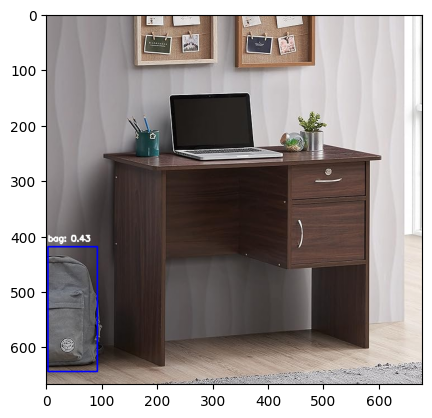

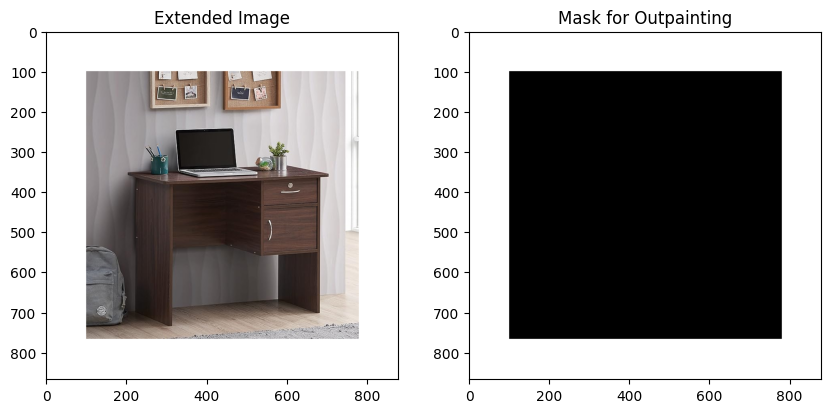

  0%|          | 0/50 [00:00<?, ?it/s]

Boxes length: 3, Detected Class IDs length: 3, Confidences length: 3, Indices length: 1
boxes [[15, 528, 193, 211], [44, 505, 152, 244], [42, 519, 156, 238]]


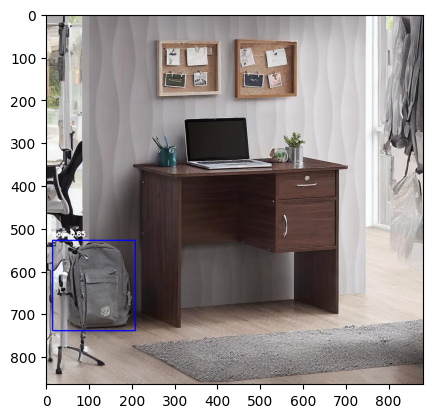

In [12]:
weights = "/kaggle/input/avataar/Avataar/yolov3.weights"
config = "/kaggle/input/avataar/Avataar/yolov3.cfg"
net = cv2.dnn.readNet(weights, config)
extended = 0
res,x,y,w,h,extended = find_obj(img_choice, possible_classes, obj, extended)
if x == -1 and  y == -1 and w == -1 and h == -1:
    print("Object not found in the image")
else:
    if extended == 1:
        img_choice = f"/kaggle/working/{res}"

In [13]:
print(img_choice)

/kaggle/working/outpainted_img.jpg


In [14]:
print(x,y,w,h)

15 528 193 211


In [15]:
image = cv2.imread(img_choice)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image_rgb)


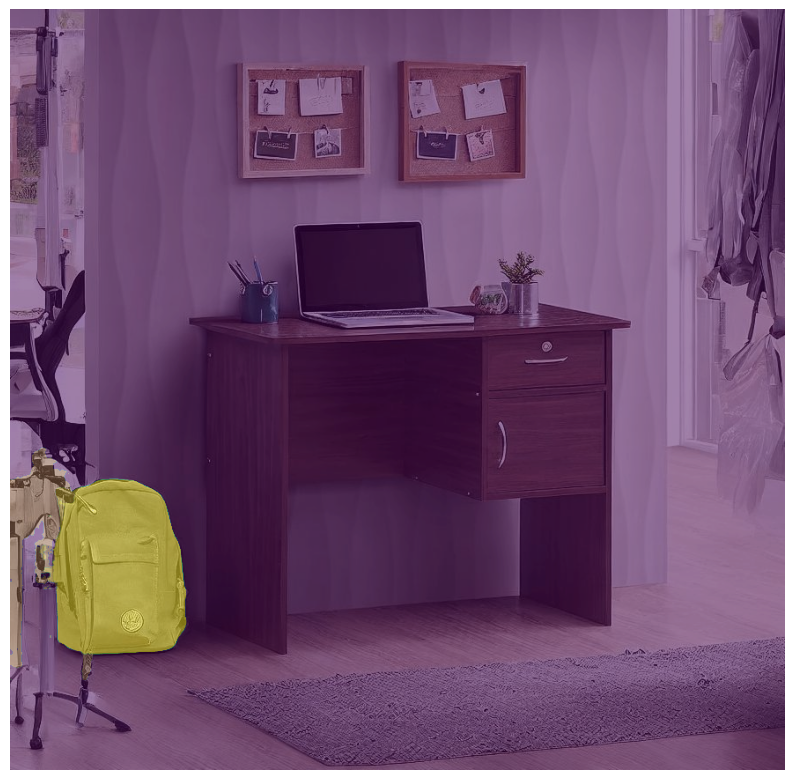

In [16]:
padding = 25

input_box = np.array([x-padding,y-padding,x+w+padding,y+h+padding])

input_box = torch.tensor(input_box).unsqueeze(0).numpy()

masks, _, _ = predictor.predict(box=input_box)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

for mask in masks:
    plt.imshow(mask, alpha=0.2)

plt.axis('off')

plt.show()

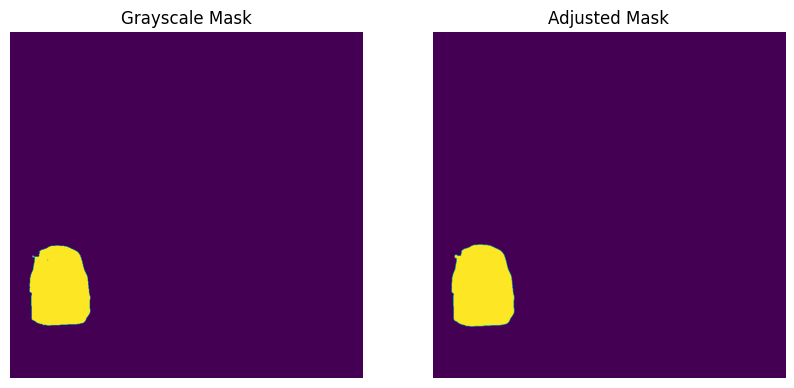

In [17]:
def binary_to_grayscale(binary_image):
    grayscale_image = binary_image.astype(np.float32) * 255.0
    return grayscale_image

def apply_gaussian_blur(image, sigma=1):
    blurred_image = gaussian_filter(image, sigma=sigma)
    return blurred_image

def adjust_contrast(image, gamma=1.0):
    adjusted_image = exposure.adjust_gamma(image, gamma)
    return adjusted_image

grayscale_mask = binary_to_grayscale(masks[0])
blurred_mask = apply_gaussian_blur(grayscale_mask, sigma=1.5)
adjusted_mask = adjust_contrast(blurred_mask, gamma=1.9)  # Adjust gamma as needed

adjusted_mask = np.clip(adjusted_mask, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Mask")
plt.imshow(grayscale_mask)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Adjusted Mask")
plt.imshow(adjusted_mask)
plt.axis('off')

plt.show()

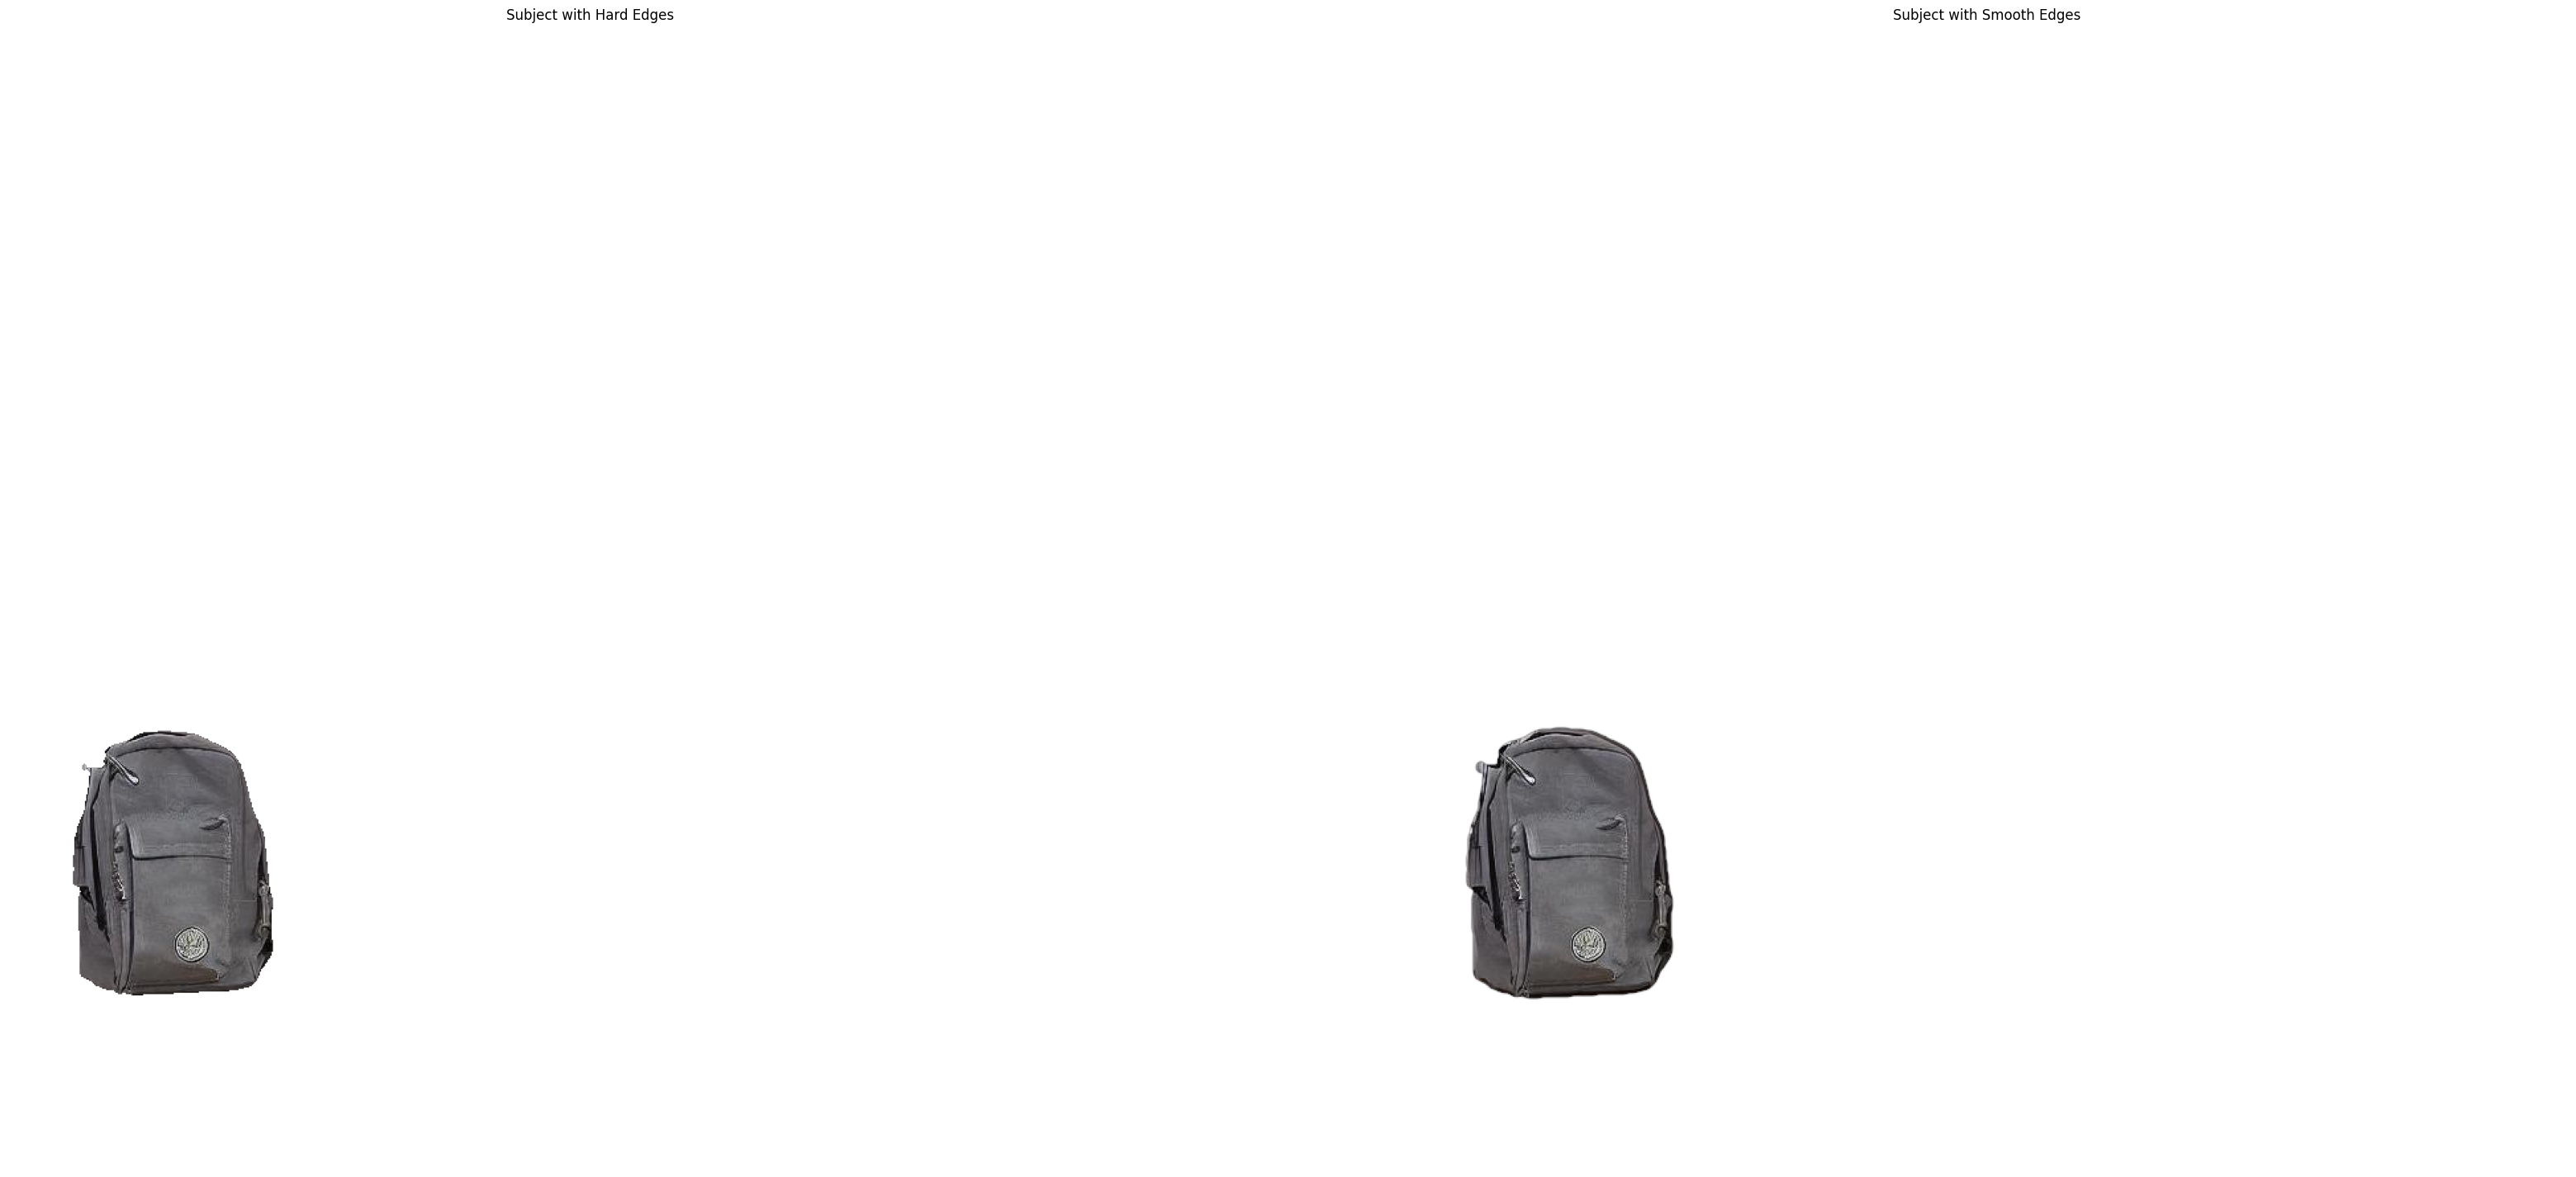

True

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

height, width, _ = image_rgb.shape
subject_image_rgba_1 = np.zeros((height, width, 4), dtype=np.uint8)
subject_image_rgba_1[..., :3] = (image_rgb * (adjusted_mask[..., np.newaxis] / 255)).astype(np.uint8)
subject_image_rgba_1[..., 3] = adjusted_mask

subject_image_rgba_2 = np.zeros((height, width, 4), dtype=np.uint8)
subject_image_rgba_2[..., :3] = np.where(mask[..., np.newaxis], image_rgb, 0)
subject_image_rgba_2[..., 3] = np.where(mask, 255, 0)

fig, axes = plt.subplots(1, 2, figsize=(40, 30))

axes[0].imshow(subject_image_rgba_2)
axes[0].set_title("Subject with Hard Edges")
axes[0].axis('off')

axes[1].imshow(subject_image_rgba_1)
axes[1].set_title("Subject with Smooth Edges")
axes[1].axis('off')


plt.show()

cv2.imwrite("subject.png", cv2.cvtColor(subject_image_rgba_1, cv2.COLOR_RGBA2BGRA))

In [34]:

def cv2_to_pil(img):
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def pil_to_cv2(pil_img):
    return cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

(864, 880)


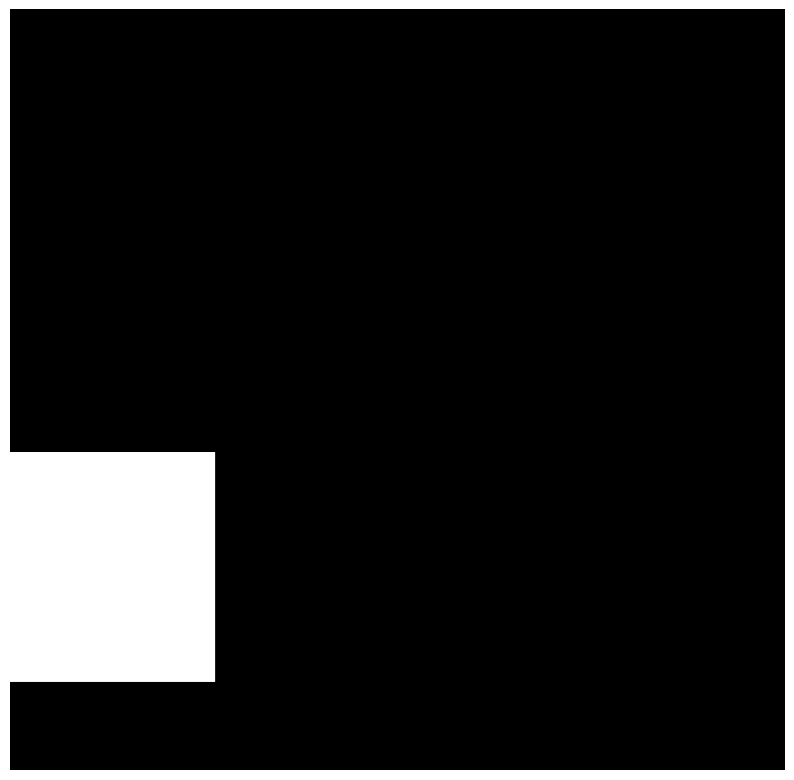

In [35]:
rect_mask = np.zeros((image_rgb.shape[0], image_rgb.shape[1]), dtype=np.uint8)
print(rect_mask.shape)
y0 = max(0,y-padding)
x0 = max(0, x-padding)
y1 = min((rect_mask.shape)[0],y+h+padding)
x1 = min((rect_mask.shape)[1],x+w+padding)
rect_mask[y0:y1, x0:x1] = 255

mask_pil = Image.fromarray(rect_mask)

plt.figure(figsize=(10, 10))
plt.imshow(mask_pil, cmap="gray")
plt.axis('off')
plt.show()


In [36]:
image_pil = Image.fromarray(image_rgb)

In [37]:
image_height = image_pil.size[1]
image_width = image_pil.size[0]

print(image_width, image_height)

880 864


  0%|          | 0/50 [00:00<?, ?it/s]

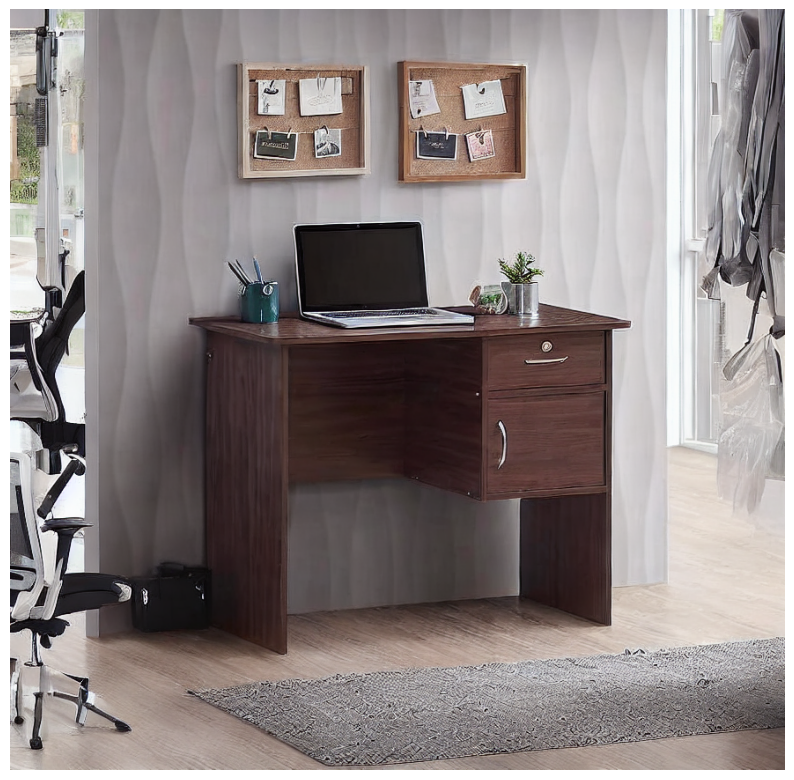

<PIL.Image.Image image mode=RGB size=880x864 at 0x7A89D25D7250>
864 880 864 880
0.0
0.0


In [38]:
prompt = "blend into background without obstructions"
negative_prompt = "objects, bookstack, characters, distinct elements, people,pots flower, plant, cup, painting, shoes, utensils, shelves, rack, table, basket, anything, bag, pouch, book, lamp, ball, bat, laptop, computer, device, keyboard, notebook, pen, paper, bottle, art, supplies, wine"

inpainted_image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=image_pil,
    mask_image=mask_pil,
    num_inference_steps=50,
    guidance_scale=15,
    height = 16*math.ceil(image_height/16),
    width = 16*math.ceil(image_width/16)
    

).images[0]

plt.figure(figsize=(10, 10))
plt.imshow(inpainted_image)
plt.axis('off')
plt.show()

print(inpainted_image)

print(height, width, image_height, image_width)

h_diff = (height - image_height)/2
w_diff = (width - image_width)/2

print(h_diff)
print(w_diff)


inpainted_image = inpainted_image.crop((w_diff,h_diff,(image_width-w_diff),(image_height-h_diff)))

height = image_height
width = image_width

inpainted_image.save("final_inpainted_image.jpg")


In [39]:
try:
    y_shift = int(input("How many pixels down do you want the object to move? (Negative for up): "))
    x_shift = int(input("How many pixels to the right do you want the object to move? (Negative for left): "))
except ValueError:
    print("Invalid input. Using default shifts of 10 pixels in each dimension")
    y_shift = 10
    x_shift = 10

How many pixels down do you want the object to move? (Negative for up):  0
How many pixels to the right do you want the object to move? (Negative for left):  360


In [40]:
final_inpainted_image = Image.open("/kaggle/working/final_inpainted_image.jpg")

subject_image = Image.open("/kaggle/working/subject.png")

subject_image = subject_image.resize(subject_image.size,Image.Resampling.LANCZOS)
final_image = final_inpainted_image.copy()
final_image.paste(subject_image, (x_shift, y_shift), subject_image)


864 880


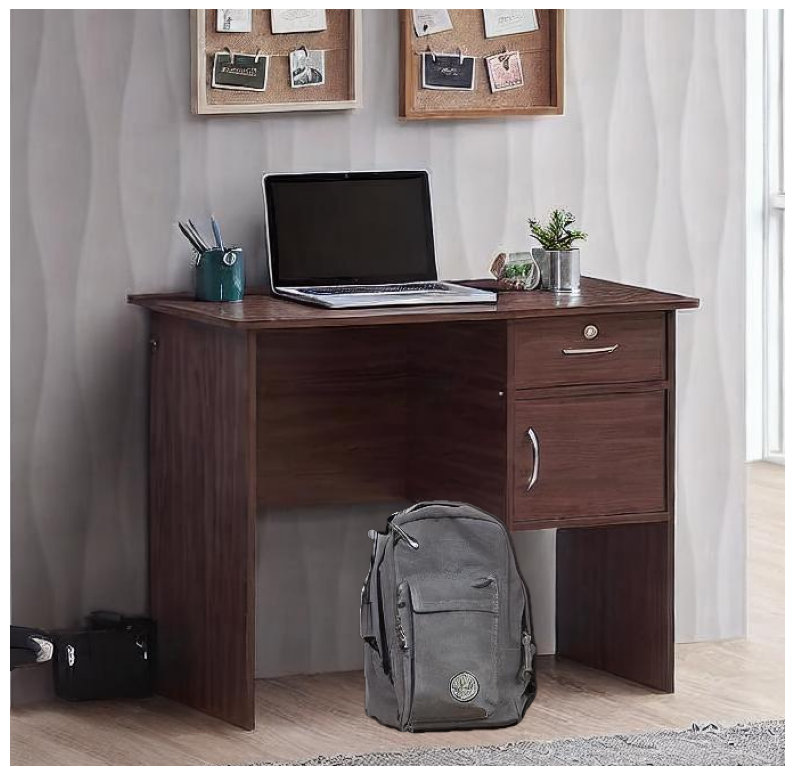

In [41]:
print(height,width)
if extended == 1:
    final_image = final_image.crop((100,100,(width-100),(height-100)))
final_image.save("final_image_PIL.png")
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

In [42]:
def blend_subject_with_background(background_path, subject_path,
                                  y_shift=0, x_shift=0,
                                  shadow_offset=(0, 5),
                                  shadow_blur=30,
                                  shadow_opacity=0.1):

    background = cv2.imread(background_path, cv2.IMREAD_COLOR)
    
    print(background.shape)

                            
    if background is None:
        raise FileNotFoundError(f"Background image not found at {background_path}")
    
    subject = cv2.imread(subject_path, cv2.IMREAD_UNCHANGED)
    
    print(subject.shape)
    if subject is None:
        raise FileNotFoundError(f"Subject image not found at {subject_path}")
    
    bg_height, bg_width = background.shape[:2]
    subj_height, subj_width = subject.shape[:2]
    if (bg_height, bg_width) != (subj_height, subj_width):
        raise ValueError("Background and subject images must have the same dimensions.")
    
    if subject.shape[2] == 4:
        subject_bgr = subject[:, :, :3]
        alpha = subject[:, :, 3]
    else:
        raise ValueError("Subject image does not have an alpha channel.")
    
    alpha_normalized = alpha.astype(float) / 255.0
    
    blurred_alpha = cv2.GaussianBlur(alpha_normalized, (5, 5), 0)
    blurred_alpha = np.clip(blurred_alpha, 0, 1)
    
    alpha_mask = cv2.merge([blurred_alpha, blurred_alpha, blurred_alpha])
    
    M_shift = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    
    shifted_subject_bgr = cv2.warpAffine(subject_bgr, M_shift, (bg_width, bg_height),
                                         flags=cv2.INTER_LINEAR,
                                         borderMode=cv2.BORDER_CONSTANT,
                                         borderValue=(0, 0, 0))
    
    shifted_alpha_mask = cv2.warpAffine(alpha_mask, M_shift, (bg_width, bg_height),
                                       flags=cv2.INTER_LINEAR,
                                       borderMode=cv2.BORDER_CONSTANT,
                                       borderValue=(0, 0, 0))
    
    shadow = np.zeros_like(background, dtype=float)
    
    shadow_alpha = blurred_alpha.copy()
    M_shadow = np.float32([[1, 0, shadow_offset[0]], [0, 1, shadow_offset[1]]])
    shifted_shadow_alpha = cv2.warpAffine(shadow_alpha, M_shadow, (bg_width, bg_height),
                                         flags=cv2.INTER_LINEAR,
                                         borderMode=cv2.BORDER_CONSTANT,
                                         borderValue=0)
    
    shifted_shadow_alpha = cv2.GaussianBlur(shifted_shadow_alpha, (shadow_blur, shadow_blur), 0)
    shifted_shadow_alpha = np.clip(shifted_shadow_alpha, 0, 1)
    
    shadow_color = np.array([0, 0, 0], dtype=float)
    
    for c in range(3):
        shadow[:, :, c] = shadow_color[c]
    
    shadow = shadow * shifted_shadow_alpha[:, :, np.newaxis] * shadow_opacity
    background_float = background.astype(float) / 255.0
    background_with_shadow = background_float + shadow
    background_with_shadow = np.clip(background_with_shadow, 0, 1)
    
    composite = background_with_shadow * (1 - shifted_alpha_mask) + \
                (shifted_subject_bgr.astype(float) / 255.0) * shifted_alpha_mask
    composite = np.clip(composite, 0, 1)
    
    composite_uint8 = (composite * 255).astype(np.uint8)
    
    return composite_uint8

background_image_path = '/kaggle/working/final_inpainted_image.jpg'
subject_image_path = '/kaggle/working/subject.png'

final_image = blend_subject_with_background(
    background_path=background_image_path,
    subject_path=subject_image_path,
    y_shift=y_shift,
    x_shift=x_shift,
    shadow_offset=(0, 20),
    shadow_blur=45,
    shadow_opacity=0.8
)


(864, 880, 3)
(864, 880, 4)


864 880


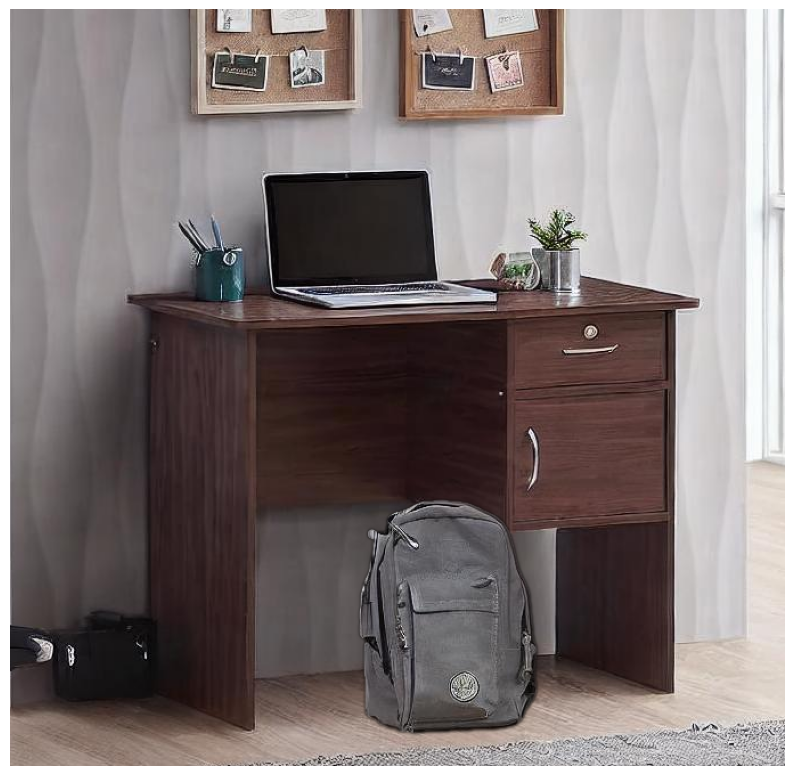

In [43]:
print(height, width)
if extended == 1:
    final_image = final_image[100:(height-100), 100:width-100]
    
final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('final_image_opencv.png', final_image)
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

    

